In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
warn.filterwarnings("ignore")

In [25]:
df = pd.read_csv("data/stud.csv")

In [26]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of Datasets

In [27]:
df.shape

(1000, 8)

## Data Checks to perform
 - check the missing values
 - check for Duplicates
 - check the Data Type
 - check the number of unique values of each columns
 - check statistics of Data sets
 - check various categories presents in the different categorical
    columns

In [28]:
#1 
df.isnull().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [29]:
#2
df.duplicated().sum()

np.int64(0)

In [30]:
#3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
#4
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [32]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [33]:
num_feature = [f for f in df.columns if df[f].dtype != "O"]
cat_feature = [f for f in df.columns if df[f].dtype == "O"]

In [34]:
num_feature

['math_score', 'reading_score', 'writing_score']

In [35]:
#creating columns total_score and average
df["Total_marks"] = df['math_score'] + df["reading_score"] + df["writing_score"]
df["Average"] = df["Total_marks"]/len(num_feature)

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
#Checking the students who got full marks in all subject
reading_full = df[df["reading_score"] == 100]['Average'].count()
writing_full = df[df["writing_score"] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [38]:
#Checking the students who got full marks in all subject
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()
math_less_20 = df[df['math_score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

In [39]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


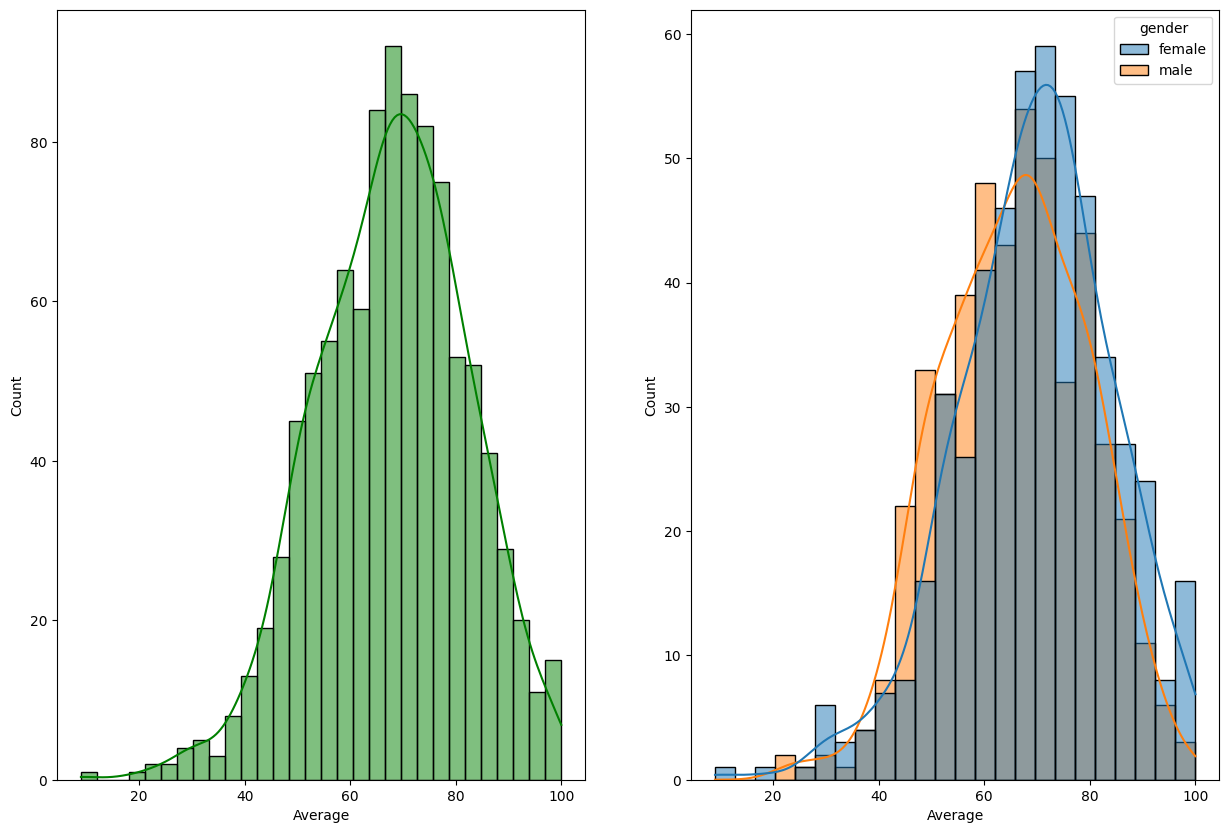

In [40]:
fig, axs = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

#### Observation
 - Female Student tend to perform well than male Student.

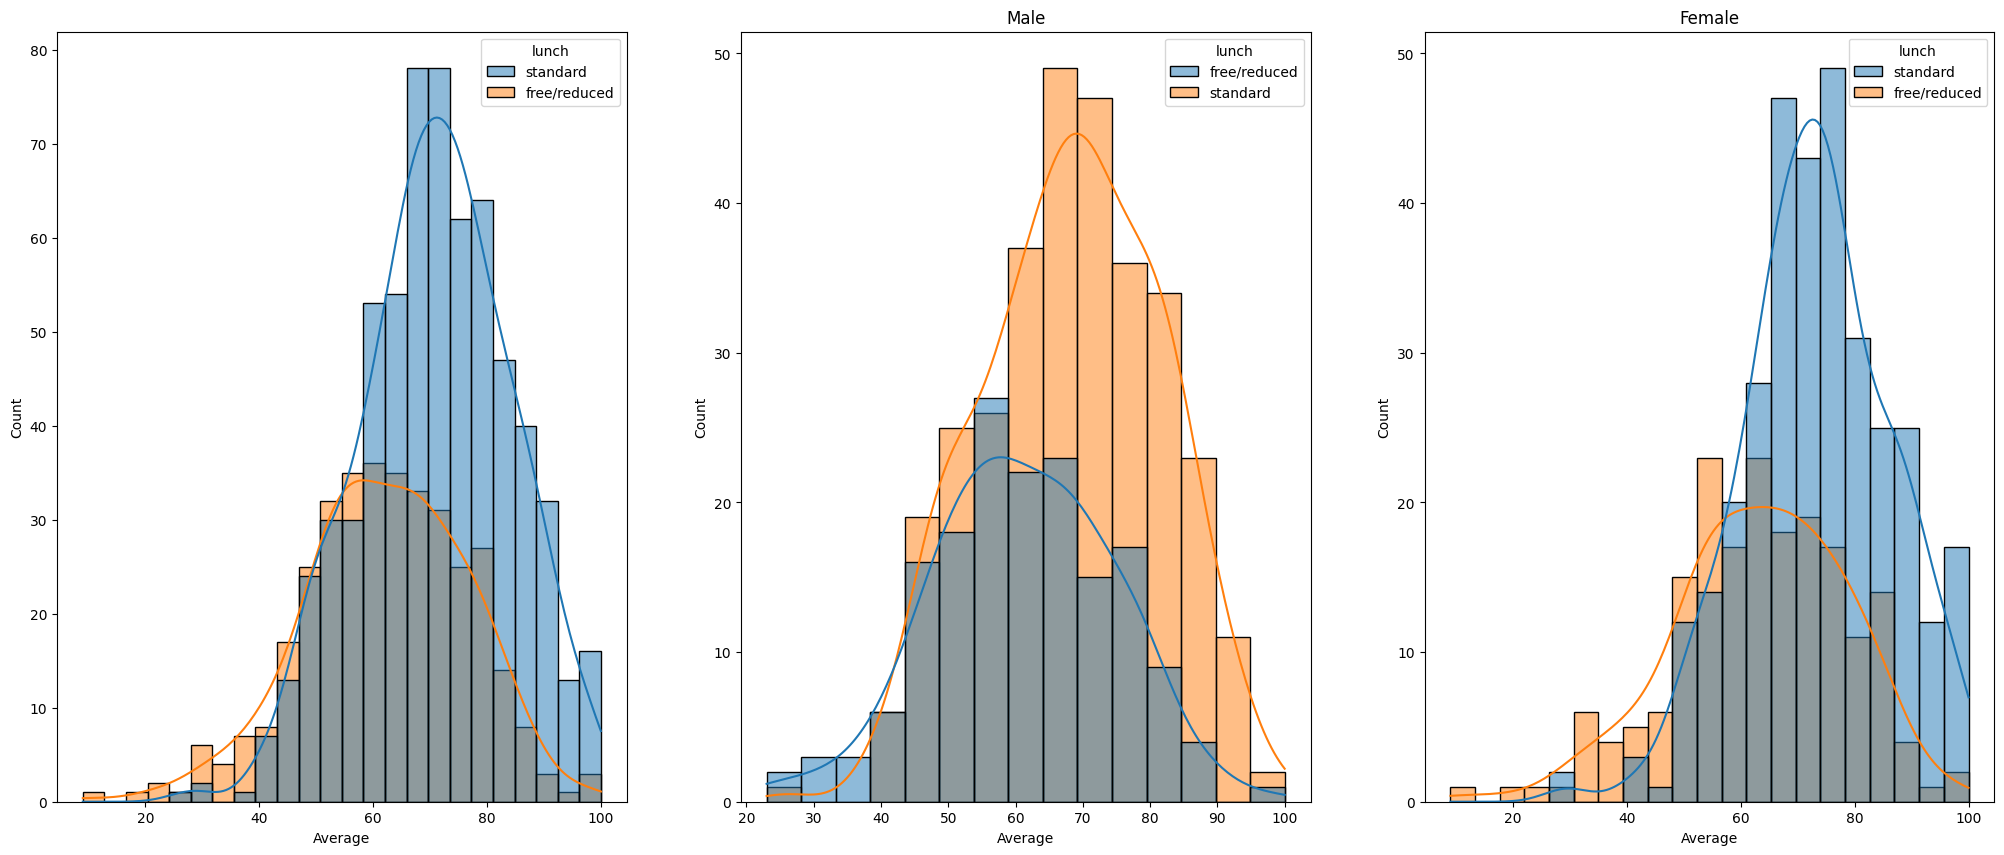

In [41]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(1,3,2)
plt.title('Male')
sns.histplot(data=df[df.gender == 'male'],x="Average",kde=True,hue='lunch')
plt.subplot(1,3,3)
plt.title('Female')
sns.histplot(data=df[df.gender == 'female'],x='Average',kde=True,hue='lunch')
plt.show()

#### Observation:
 - Standard lunch help student to perform well in exam irrespective of their Gender.

<Axes: title={'center': 'Female'}, xlabel='Average', ylabel='Count'>

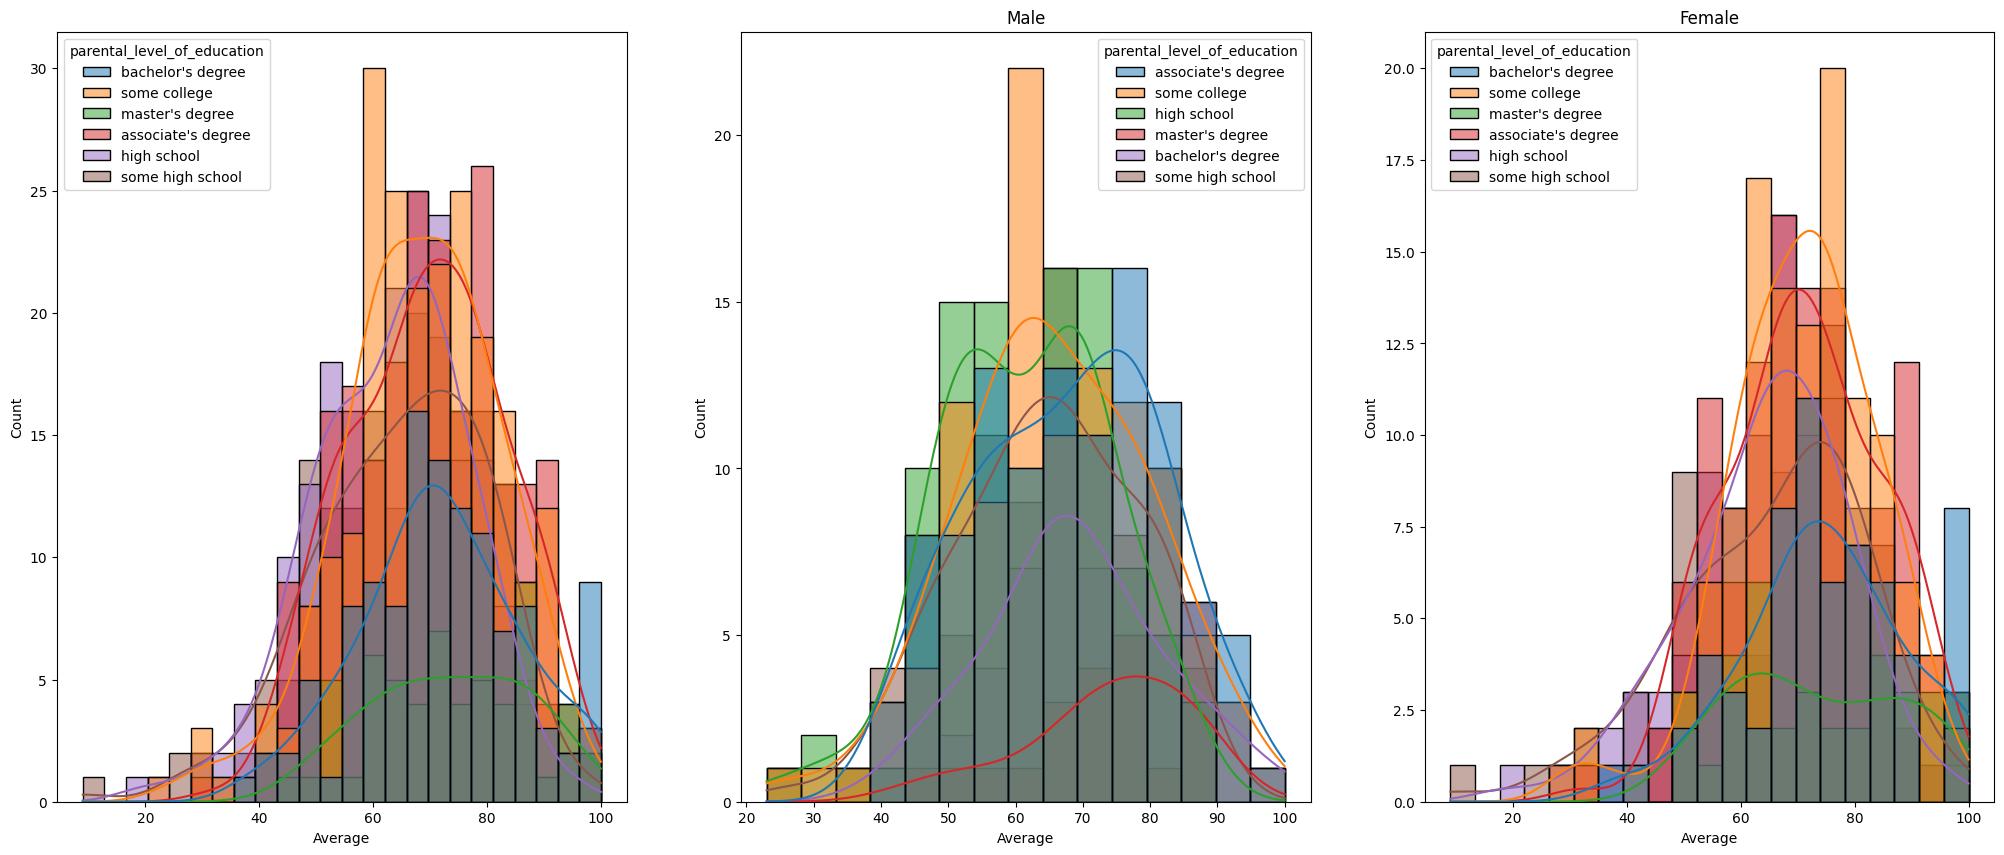

In [42]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
plt.title("Male")
sns.histplot(data=df[df.gender == "male"],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
plt.title("Female")
sns.histplot(data=df[df.gender == "female"],x='Average',kde=True,hue='parental_level_of_education')

#### Observation:
 - In general Parental education doesn't effect the student performance in their exam.
 - W.R.T Male Student we can see those parents have done associate degree their child tend to perform well in exam.
 - w.r.t Female student we can see their parental education doesn't effect them.

<Axes: title={'center': 'Female'}, xlabel='Average', ylabel='Count'>

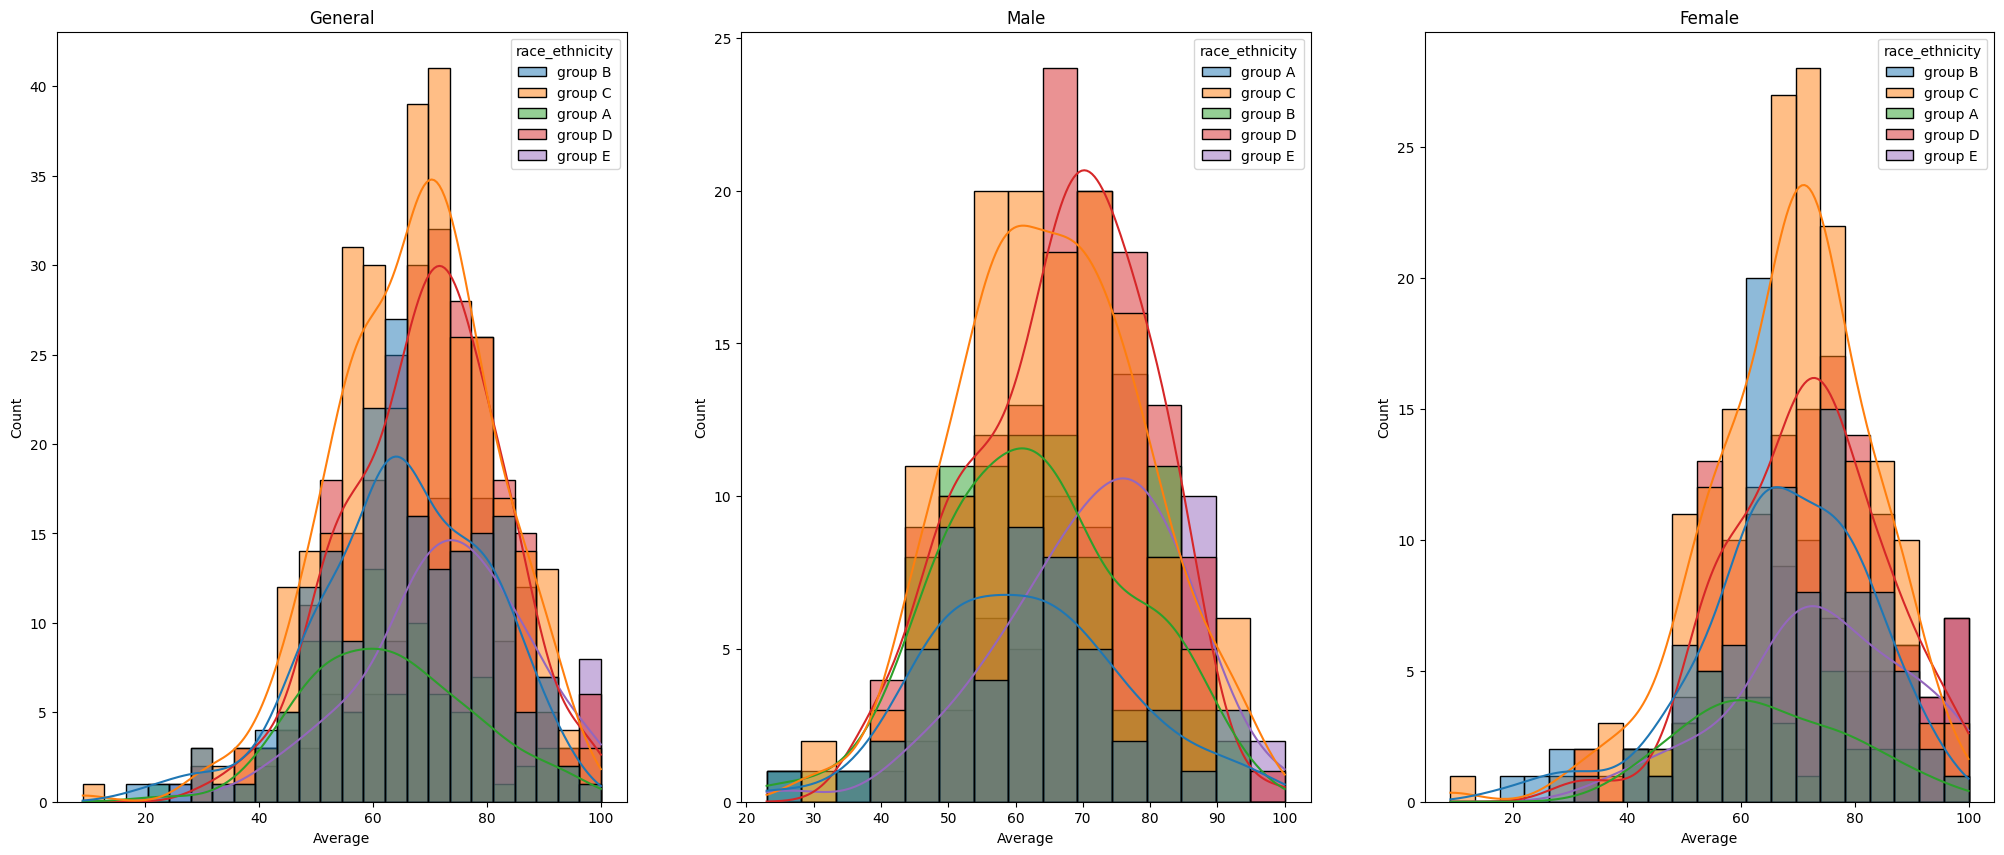

In [43]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(1,3,1)
plt.title("General")
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(132)
plt.title("Male")
sns.histplot(data=df[df.gender == 'male'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(133)
plt.title("Female")
sns.histplot(data=df[df.gender == 'female'],x='Average',kde=True,hue='race_ethnicity')

#### Observation:
 - Group-A and Group-B tends to perform poor in general as well as irrespective of their gender.

In [44]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_marks', 'Average'],
      dtype='object')

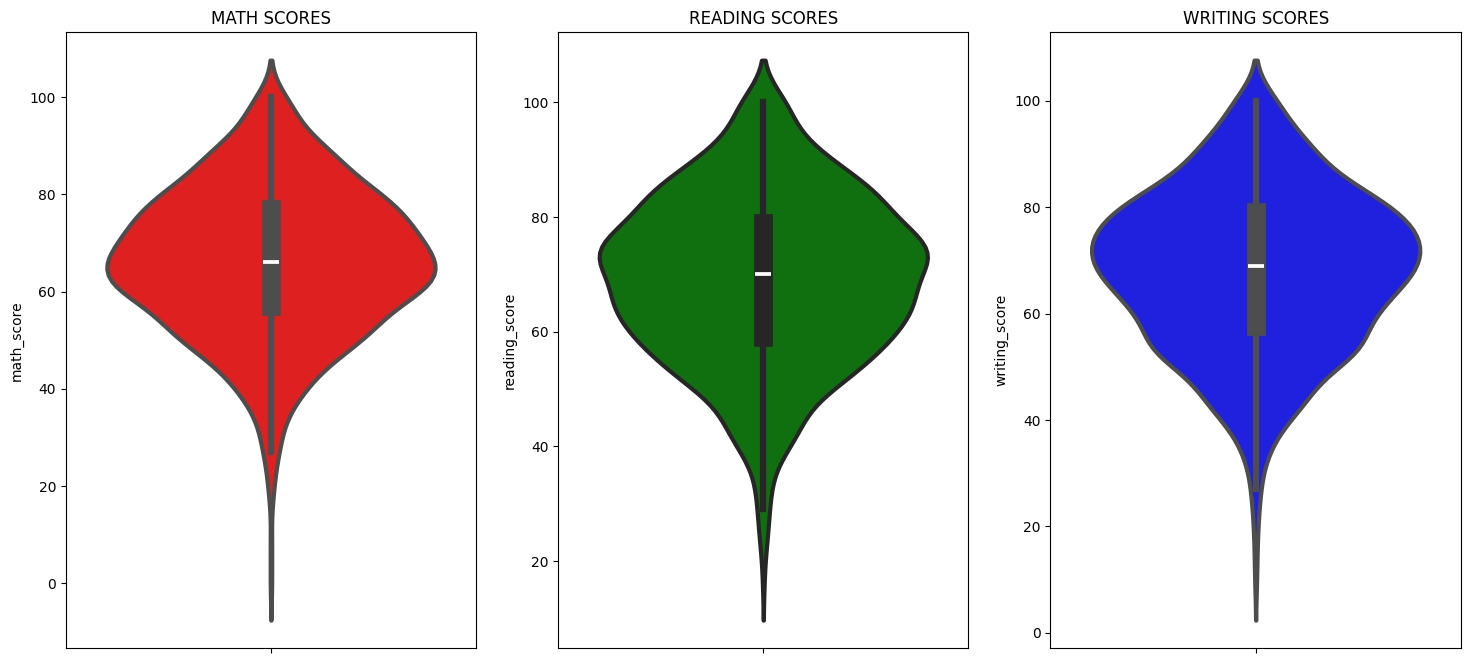

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

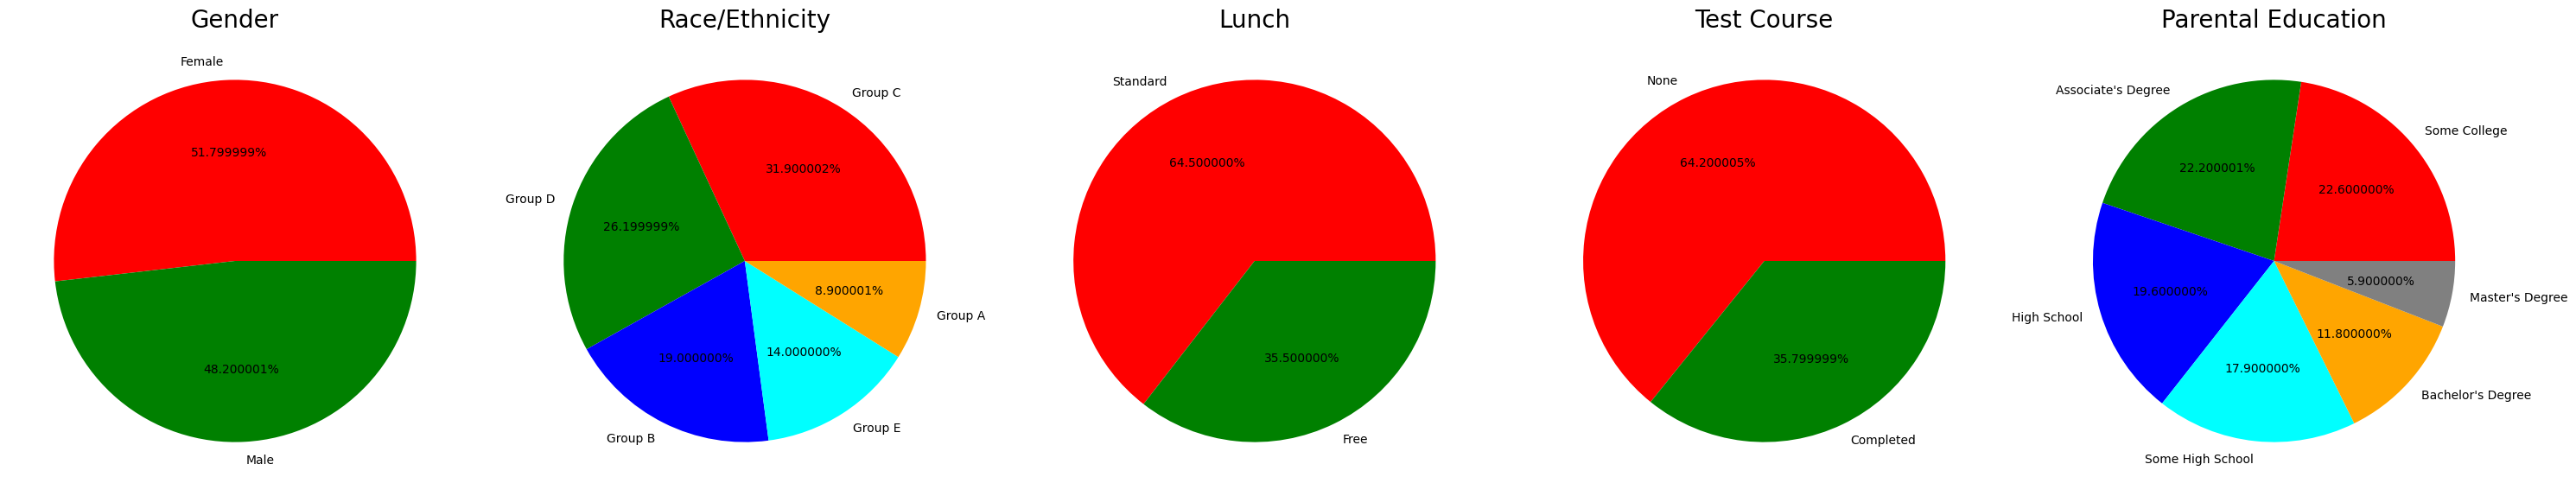

In [46]:
plt.rcParams['figure.figsize'] = (30, 30)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Observation:
 - From Above visualization we can clearly see that `Female` and `Male` population are nearly same.
 
 - Ethnic groups like `Group-C` ,`Group-D` have higher population,`Group-A` and `Group-E` have comparitively lower population.
 - Lunch have options like `Standard` and `Free`, Students with `Free` lunch are in minority and Students with `Standard` lunch are in majority.
 - For Test course large number of student have `not-completed` and some of them have `completed`.
 - Number of students whose parental education is `Some College` is greater followed closely by `Associate's Degree`.

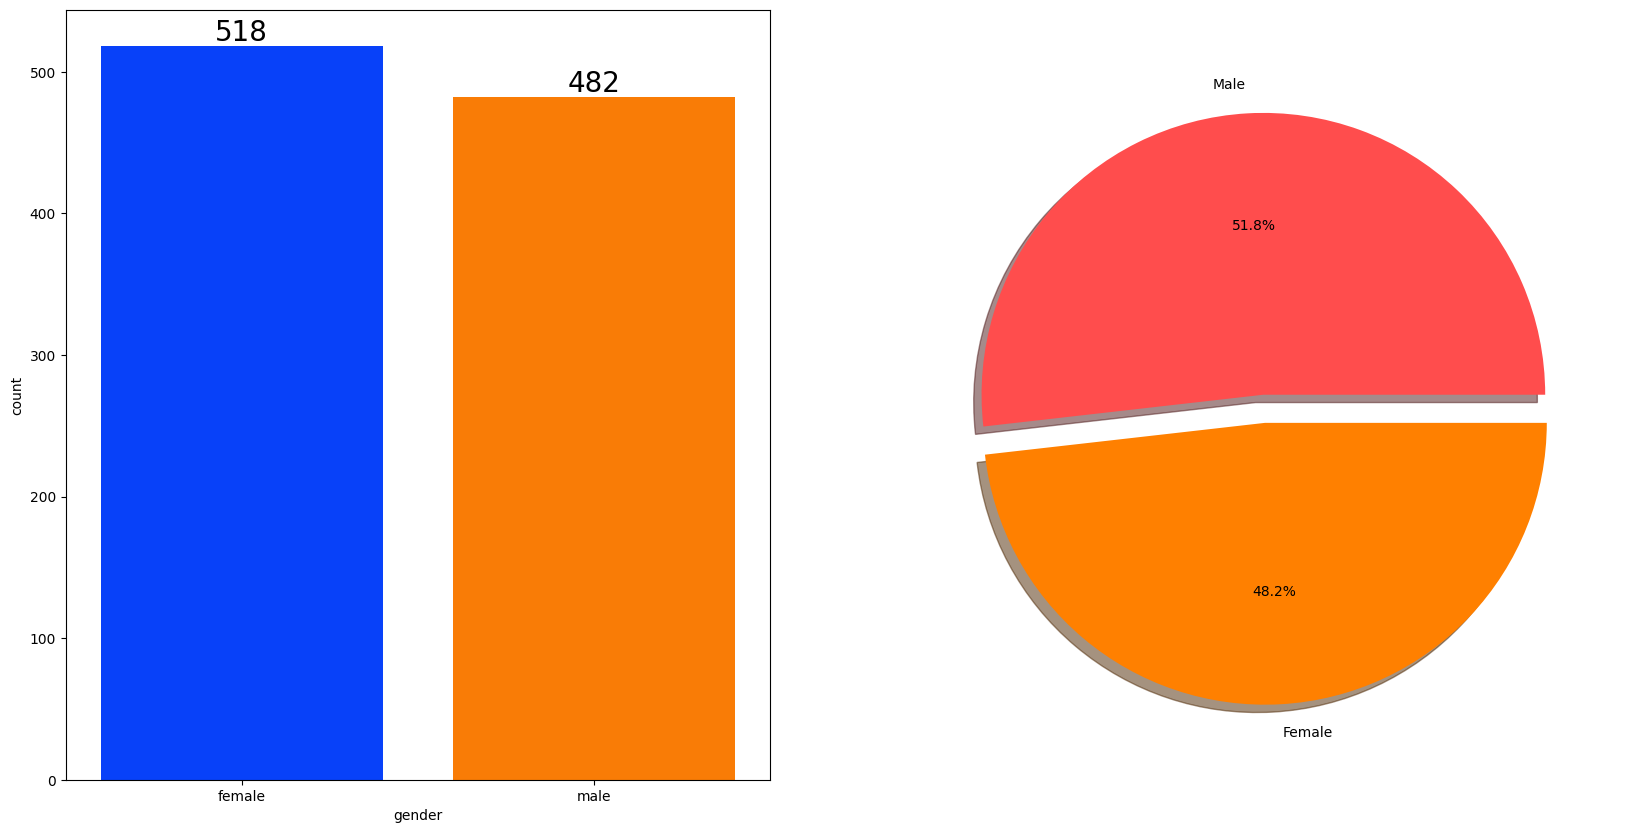

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()